In [1]:
#Importing the libraries

import pandas as pd
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision
import torch
import torchvision.transforms as transforms

In [127]:
# Reading the csv file

train_data = pd.read_csv("training_facial_keypoints.csv")
train_data.T

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253,69.6807,64.1319,67.4689,65.8029,64.1212,...,69.2299,63.353,65.7112,67.9293,66.8672,67.4025,66.1344,66.6907,70.9651,66.9383
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213,39.9687,34.29,39.4135,34.7552,36.7403,...,38.5756,35.6713,38.8435,35.8466,37.3569,31.8426,38.3655,36.8452,39.8537,43.4245
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448,29.1836,29.579,29.356,27.4758,29.4689,...,29.4079,33.9521,32.2688,28.6878,30.7509,29.7467,30.4786,31.6664,30.5433,31.0961
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042,37.5634,33.138,39.6217,36.1856,38.3902,...,38.3455,40.8164,37.706,41.4525,40.1157,38.6329,39.9502,39.685,40.7723,39.5286
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659,62.8643,57.7972,59.555,58.6522,58.6209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213,40.1693,35.154,40.4548,37.3293,37.8406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159,76.8982,69.0266,75.5916,72.953,71.272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845,41.1719,34.29,40.0382,35.8995,37.2903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824,36.401,34.7617,37.4782,36.3424,36.3446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949,39.3676,33.714,40.4548,37.0432,39.4905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# Dropping null values from the dataframe
train_data = train_data.dropna()

In [129]:
train_data.T

,0,1,2,3,4,5,6,7,8,9,...,2272,2273,2274,2275,2276,2277,2278,2281,2282,2283
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253,69.6807,64.1319,67.4689,65.8029,64.1212,...,66.8276,64.1266,63.7383,64.6446,64.3836,67.1804,65.7245,68.4309,64.1522,66.6838
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213,39.9687,34.29,39.4135,34.7552,36.7403,...,30.6204,33.0961,34.4077,34.2801,35.1046,35.8164,36.301,38.652,30.6916,34.4834
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448,29.1836,29.579,29.356,27.4758,29.4689,...,25.1119,25.7165,26.8542,28.2843,30.4249,33.24,25.3776,28.8959,27.0009,30.7845
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042,37.5634,33.138,39.6217,36.1856,38.3902,...,33.2985,38.118,39.1458,38.5869,33.3993,34.9219,37.3112,37.617,40.8681,38.5789
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659,62.8643,57.7972,59.555,58.6522,58.6209,...,58.3836,57.8872,56.2976,57.7565,57.8144,59.348,58.5306,61.6594,56.5056,59.2553
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213,40.1693,35.154,40.4548,37.3293,37.8406,...,33.1725,34.9527,36.6626,36.5883,37.7151,37.0009,37.7398,40.1009,34.127,36.0651
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159,76.8982,69.0266,75.5916,72.953,71.272,...,77.104,73.3182,72.4678,73.6738,72.5512,72.6679,74.449,75.5868,73.4368,73.9427
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845,41.1719,34.29,40.0382,35.8995,37.2903,...,32.5448,32.9135,34.2977,33.5848,35.8414,37.0976,37.5255,40.2192,28.5563,34.6247
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824,36.401,34.7617,37.4782,36.3424,36.3446,...,33.5558,34.1777,35.5749,36.335,40.1933,39.4043,33.551,37.6651,34.7461,37.4785
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949,39.3676,33.714,40.4548,37.0432,39.4905,...,34.4958,38.4832,39.8849,39.3751,36.5782,36.5899,38.1071,39.0872,40.5069,39.398


In [130]:
def show_images(df, indxs, ncols=5, figsize=(15,10), with_keypoints=True):
    '''
    Show images with keypoints in grids
    Args:
        df (DataFrame): data (M x N)
        idxs (iterators): list, Range, Indexes
        ncols (integer): number of columns (images by rows)
        figsize (float, float): width, height in inches
        with_keypoints (boolean): True if show image with keypoints
    '''
    plt.figure(figsize=figsize)
    nrows = len(indxs) // ncols + 1
    for i, idx in enumerate(indxs):
        image = np.fromstring(df.loc[idx, 'Image'], sep=' ').astype(np.float32).reshape(-1, 96)
        if with_keypoints:
            keypoints = df.loc[idx].drop('Image').values.astype(np.float32).reshape(-1, 2)
        else:
            keypoints = []
        plt.subplot(nrows, ncols, i + 1)
        plt.title(f'Sample #{idx}')
        plt.axis('off')
        plt.tight_layout()
        show_keypoints(image, keypoints)
    plt.show()

def show_keypoints(image, keypoints):
    '''
    Show image with keypoints
    Args:
        image (array-like or PIL image): The image data. (M, N)
        keypoints (array-like): The keypoits data. (N, 2)
    '''
      
    plt.imshow(image, cmap='gray')
    if len(keypoints):
        plt.scatter(keypoints[:, 0], keypoints[:, 1], s=24, marker ='.', c='r')

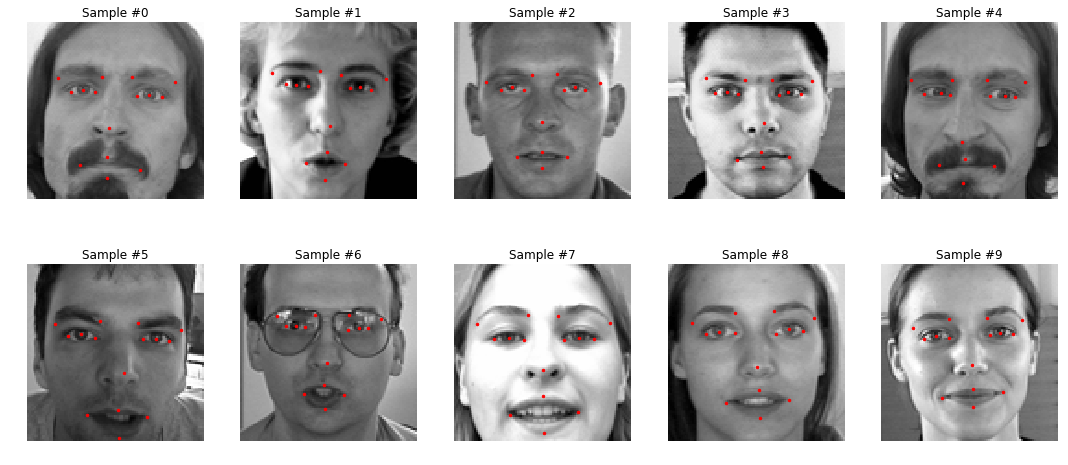

In [131]:
# veiwing train images

show_images(train_data, range(10))

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [7]:
import torch 
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils
from torch import nn, optim
import torch.nn.functional as F

In [8]:
class FacialKeypointRecognition(Dataset):
    '''Facial keypoint dataset extraction'''
    def __init__(self, dataframe, train=True, transform=None):
        self.dataframe = dataframe
        self.train = train
        self.transform = transform
        
    def __len__(self):
        return(len(self.dataframe))
    
    def __getitem__(self, idx):
        image = np.fromstring(self.dataframe.iloc[idx, -1], sep=' ')\
        .astype(np.float32).reshape(-1,96,96,1)
        
        if self.train:
            keypoints = self.dataframe.iloc[idx, : -1].values.astype(np.float32)
        else:
            keypoints = None
        sample = {'image':image, 'keypoints':keypoints}
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample
        

In [24]:
class Normalize(object):
    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']
        return ({'image':image/255., 'keypoints':keypoints}) 

    
class ToTensor(object):
    def __call__(self, sample):
        image, keypoints = sample['image'], sample['keypoints']
        image = image.reshape(-1, 96, 96)
        image = torch.from_numpy(image)

        if keypoints is not None:
            keypoints = torch.from_numpy(keypoints)
            return ({'image':image, 'keypoints':keypoints})
        else:
            return ({'image':image})

In [25]:
class RandomHorizontalFlip(object):
    def __init__(self, p=0.5):
        self.p = p
    
    def __call__(self, sample):
        flip_indices = [(0,2), (1,3),
                        (4,8), (5,9), (6,10), (7,11),
                       (12,16), (13, 17), (14, 18), (15,19),
                       (22,24), (23,25)]
        image, keypoints = sample['image'], sample['keypoints']
        if np.random.random()<self.p:
            image = image[:, ::-1]
            if keypoints is not None:
                for a, b in flip_indices:
                    keypoints[a], keypoints[b] = keypoints[b], keypoints[a]
                keypoints[::2] = 96. - keypoints[::2]
        return {'image':image, 'keypoints':keypoints}

In [26]:
def prepare_train_valid_loader(trainset, valid_size = 0.2, batch_size = 128):
    num_train = len(trainset)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size*num_train))
    train_idx, valid_idx = indices[split:], indices[:split]
    
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    
    train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, 
                                               sampler = train_sampler)
    valid_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size,
                                              sampler = valid_sampler)
    return train_loader, valid_loader
    
    

In [27]:
aug_tfm = transforms.Compose([RandomHorizontalFlip(p=0.5),
                             Normalize(),ToTensor()])
aug_trainset = FacialKeypointRecognition(dataframe, transform = aug_tfm)
 
aug_train_loader, aug_valid_loader =  prepare_train_valid_loader(aug_trainset, valid_size=0.2,
                                                                 batch_size=20)

In [28]:
print("Type of augmented trainset after conversion",type(aug_trainset))
print("Type of train loader and valid loader",type(aug_train_loader))

Type of augmented trainset after conversion <class '__main__.FacialKeypointRecognition'>
Type of train loader and valid loader <class 'torch.utils.data.dataloader.DataLoader'>


In [108]:
class CNN(nn.Module):
    def __init__(self, outputs=30):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*12*12, 1024)
        self.fc2 = nn.Linear(1024, outputs)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64*12*12)
        x = F.relu(self.fc1(self.dropout(x)))
        x = self.fc2(self.dropout(x))
        
        return x

In [109]:
# checking if cuda is available or not

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [110]:
def train(trainloader, validloader, model, criterion, optimizer,
         n_epochs=50, saved_model = 'model.pt'):
    valid_loss_min = np.inf
    
    train_losses = [] 
    valid_losses = []
    
    for epoch in range(n_epochs):
        train_loss = 0.0
        valid_loss = 0.0
        
        model.train()
        for batch in trainloader:
            optimizer.zero_grad()
            output = model(batch['image'].to(device))
            loss = criterion(output, batch['keypoints'].to(device))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*batch['image'].size(0)
            
        model.eval()
        for batch in validloader:
            output = model(batch['image'].to(device))
            valid_loss += loss.item()*batch['image'].size(0)
            
        train_loss = np.sqrt(train_loss/len(trainloader.sampler.indices))
        valid_loss = np.sqrt(valid_loss/len(validloader.sampler.indices))
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        print('Epoch: {} \t Training loss: {:.6f} \t Validation loss: {:.6f}'
              .format(epoch+1, train_loss, valid_loss))
        if valid_loss <= valid_loss_min:
            print("Validation loss decreased ({:.6f}) ----> {:.6f}. Saving model".
                 format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), saved_model)
            valid_loss_min = valid_loss
    return train_losses, valid_losses

In [111]:
# creating object for class CNN
# to(device) moves all cpu values to GPU


model = CNN(outputs=30)
model = model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

train_losses, valid_losses = train(aug_train_loader, aug_valid_loader, model, criterion, optimizer, n_epochs = 50, saved_model = "aug_cnn.pt")

Epoch: 1 	 Training loss: 16.343484 	 Validation loss: 4.516293
Validation loss decreased (inf) ----> 4.516293. Saving model
Epoch: 2 	 Training loss: 4.388136 	 Validation loss: 3.770515
Validation loss decreased (4.516293) ----> 3.770515. Saving model
Epoch: 3 	 Training loss: 4.170780 	 Validation loss: 4.759138
Epoch: 4 	 Training loss: 4.120383 	 Validation loss: 3.467867
Validation loss decreased (3.770515) ----> 3.467867. Saving model
Epoch: 5 	 Training loss: 4.117152 	 Validation loss: 3.785481
Epoch: 6 	 Training loss: 4.058772 	 Validation loss: 5.096113
Epoch: 7 	 Training loss: 3.989880 	 Validation loss: 3.727285
Epoch: 8 	 Training loss: 4.034720 	 Validation loss: 4.351548
Epoch: 9 	 Training loss: 3.865022 	 Validation loss: 3.531348
Epoch: 10 	 Training loss: 3.932555 	 Validation loss: 4.613579
Epoch: 11 	 Training loss: 3.791116 	 Validation loss: 3.666919
Epoch: 12 	 Training loss: 3.808225 	 Validation loss: 3.607339
Epoch: 13 	 Training loss: 3.765675 	 Validatio

In [112]:
def plot_RMSE(train_losses, valid_losses, y_max=50):
    plt.plot(train_losses, "--", linewidth=3, label="train")
    plt.plot(valid_losses, linewidth=3, label="val")
    plt.legend()
    plt.grid()
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.ylim((0, y_max))
    plt.show()

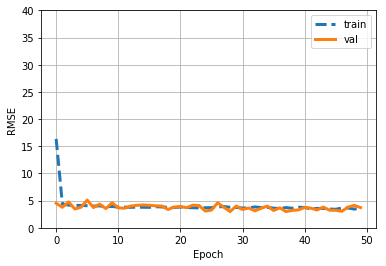

In [113]:
plot_RMSE(train_losses, valid_losses, y_max=40)

In [114]:
test_data = pd.read_csv("test.csv")

In [115]:
test_data.T

,0,1,2,3,4,5,6,7,8,9,...,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782
ImageId,1,2,3,4,5,6,7,8,9,10,...,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783
Image,182 183 182 182 180 180 176 169 156 137 124 10...,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,177 176 174 170 169 169 168 166 166 166 161 14...,176 174 174 175 174 174 176 176 175 171 165 15...,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,177 177 177 171 142 115 97 84 89 90 88 82 63 5...,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...,156 160 162 166 150 114 97 105 125 127 119 121...,230 230 231 231 231 231 231 231 231 229 214 20...,132 129 126 128 146 163 170 169 143 101 71 55 ...,...,213 213 212 213 213 212 188 161 161 169 183 16...,123 131 106 54 24 20 17 12 20 16 16 15 15 15 1...,142 131 114 108 107 125 145 172 176 175 176 17...,71 71 70 69 69 70 74 77 82 85 86 87 88 90 98 1...,100 106 105 106 105 104 104 108 112 114 111 10...,101 101 101 100 100 97 97 98 102 149 214 206 1...,201 191 171 158 145 140 136 130 123 115 108 10...,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...,63 61 64 66 66 64 65 70 69 70 77 83 63 34 22 2...


In [116]:
test_data.isnull().sum()

ImageId    0
Image      0
dtype: int64

In [117]:
test_transform = transforms.Compose([Normalize(),ToTensor()])
test_set = FacialKeypointRecognition(test_data, transform = test_transform)

In [118]:
type(test_set)

__main__.FacialKeypointRecognition

In [119]:
testloader = torch.utils.data.DataLoader(test_set)

In [120]:
# loading stored weights 

model.load_state_dict(torch.load('aug_cnn.pt'))

In [121]:
def predict(data_loader, model):
    model.eval() # prep model for evaluation

    with torch.no_grad():
        for i, batch in enumerate(data_loader):
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(batch['image'].to(device)).cpu().numpy()
            if i == 0:
                predictions = output
            else:
                predictions = np.vstack((predictions, output))
    
    return predictions

In [122]:
def view_pred_df(columns, test_df, predictions, image_ids=range(1,6)):
    '''
    Display predicted keypoints
    Args:
        columns (array-like): column names
        test_df (DataFrame): dataframe with ImageId and Image columns
        predictions (array-like): keypoints in float (no. of images x keypoints)
        image_id (array-like): list or range of ImageIds begin at 1
    '''
    pred_df = pd.DataFrame(predictions, columns=columns)
    pred_df = pd.concat([pred_df, test_df], axis=1)
    pred_df = pred_df.set_index('ImageId')
    show_images(pred_df, image_ids)

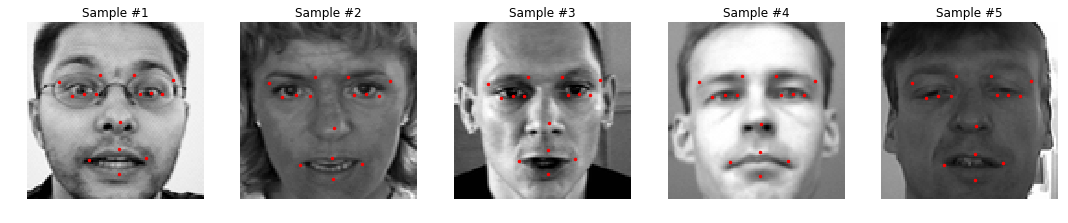

In [132]:
model.load_state_dict(torch.load('aug_cnn.pt'))
predictions = predict(testloader, model)
columns = dataframe.drop('Image', axis=1).columns
view_pred_df(columns, test_data, predictions)